In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
from tensorflow.keras.utils import get_file

#to handle the error
try:
    path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Error downloading')
    raise

print(path)

df = pd.read_csv(path, header=None)

C:\Users\rahul\.keras\datasets\kddcup.data_10_percent.gz


In [3]:
# The DataFrame contains network intrusion data from the KDD Cup 1999 dataset.
#  The column names correspond to different features of the network traffic, such as the duration of the connection, the type of protocol used, the number of bytes sent and received.
# The "outcome" column indicates the type of intrusion: normal, or one of several types of attacks, such as denial-of-service, probe, or user-to-root.


df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]
# This is Python code that assigns column names to a Pandas DataFrame and displays the first 19289 rows.
df[0:19289]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.00,0.00,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.00,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19284,0,tcp,smtp,SF,1089,492,0,0,0,0,...,242,0.95,0.03,0.02,0.01,0.0,0.0,0.0,0.0,normal.
19285,0,tcp,smtp,SF,1204,499,0,0,0,0,...,242,0.94,0.04,0.01,0.01,0.0,0.0,0.0,0.0,normal.
19286,0,udp,private,SF,28,0,0,1,0,0,...,1,0.01,0.05,0.01,0.00,0.0,0.0,0.0,0.0,teardrop.
19287,0,udp,private,SF,28,0,0,3,0,0,...,2,0.03,0.05,0.03,0.00,0.0,0.0,0.0,0.0,teardrop.


In [4]:
print("Read {} rows.".format(len(df)))  #the number of rows in the loaded dataset.
print('='*40)
print('The number of data points are:', df.shape[0])  #the number of data points in the dataset.
print('='*40)
print('The number of features are:', df.shape[1]) # the number of features (columns) in the dataset.
print('='*40)
output = df['outcome'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 494021 rows.
The number of data points are: 494021
The number of features are: 42
The different type of output labels are: {'spy.', 'phf.', 'buffer_overflow.', 'loadmodule.', 'satan.', 'back.', 'neptune.', 'pod.', 'smurf.', 'multihop.', 'perl.', 'warezclient.', 'teardrop.', 'ftp_write.', 'guess_passwd.', 'ipsweep.', 'portsweep.', 'imap.', 'land.', 'rootkit.', 'normal.', 'warezmaster.', 'nmap.'}
The number of different output labels are: 23


In [5]:
# Checking for NULL values in a more modern way
# .sum() is a direct way to count the rows with nulls
null_count = df.isnull().any(axis=1).sum()
print(f'Number of rows with null values: {null_count}')
print('='*40)

# Checking for DUPLICATE values (This line was already correct)
# Get the number of duplicates before dropping them
duplicates_before = df.duplicated().sum()
print(f'Found {duplicates_before} duplicate rows. Dropping them...')
df.drop_duplicates(keep='first', inplace=True)
print('='*40)


#drop ROWS with missing values
# axis=0 is for rows (or you can omit `axis` as it's the default)
print('Dropping rows with any missing values...')
df.dropna(inplace=True, axis=0)

# Stored the data into a pickle file so we can load through
# df.to_pickle('df.pkl')

print(f"Cleaned data now has {len(df)} rows.")

Number of rows with null values: 0
Found 348435 duplicate rows. Dropping them...
Dropping rows with any missing values...
Cleaned data now has 145586 rows.


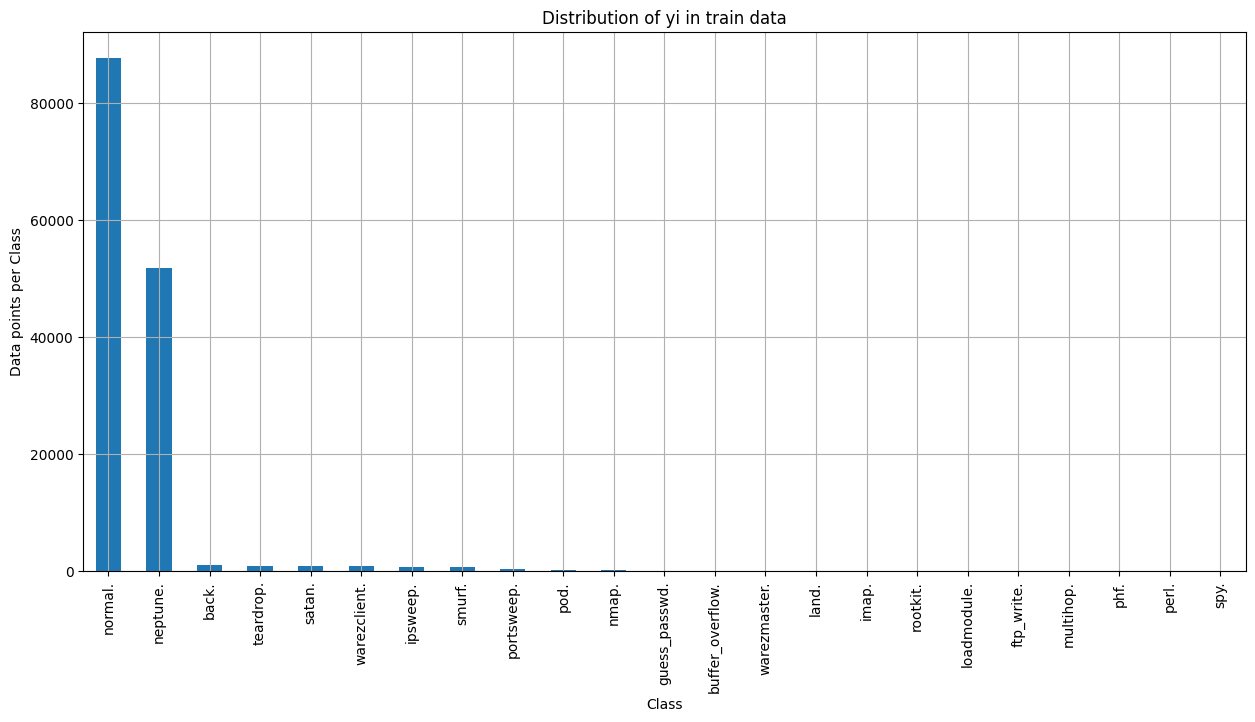

In [6]:
# Exploratory data analysis, This code generates a bar plot that shows the distribution of different output labels in the dataset.
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7)) #width 15 inches and height 7 inches
class_distribution = df['outcome'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [7]:
#This code sorts the different classes in the dataset based on their frequency (in descending order)
#and then prints the number of data points in each class along with its percentage of the total dataset size

sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

#df.groupby('outcome')['outcome'].count() #this could also be used if you want no-fromatted for above.

Number of data points in class normal. : 87832 ( 60.33 %)
Number of data points in class neptune. : 51820 ( 35.594 %)
Number of data points in class back. : 968 ( 0.665 %)
Number of data points in class teardrop. : 918 ( 0.631 %)
Number of data points in class satan. : 906 ( 0.622 %)
Number of data points in class warezclient. : 893 ( 0.613 %)
Number of data points in class ipsweep. : 651 ( 0.447 %)
Number of data points in class smurf. : 641 ( 0.44 %)
Number of data points in class portsweep. : 416 ( 0.286 %)
Number of data points in class pod. : 206 ( 0.141 %)
Number of data points in class nmap. : 158 ( 0.109 %)
Number of data points in class guess_passwd. : 53 ( 0.036 %)
Number of data points in class buffer_overflow. : 30 ( 0.021 %)
Number of data points in class warezmaster. : 20 ( 0.014 %)
Number of data points in class land. : 19 ( 0.013 %)
Number of data points in class imap. : 12 ( 0.008 %)
Number of data points in class rootkit. : 10 ( 0.007 %)
Number of data points in class

In [8]:
ENCODING = 'utf-8' #  unicode transformation format - 8,  UTF-8 is a character encoding that can represent all possible characters in the Unicode standard,

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [9]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

analyze(df)


145586 rows
** duration:2495 (1%)
** protocol_type:[tcp:89.92%,udp:8.43%,icmp:1.65%]
** service:[http:42.62%,private:33.7%,smtp:6.68%,domain_u:3.73%,other:3.28%,ftp_data:3.15%,ecr_i:0.71%,eco_i:0.63%,ftp:0.55%,finger:0.46%,telnet:0.35%,urp_i:0.3%,auth:0.23%,ntp_u:0.2%,pop_3:0.14%,time:0.1%,csnet_ns:0.09%,remote_job:0.08%,gopher:0.08%,imap4:0.08%,discard:0.08%,systat:0.08%,iso_tsap:0.08%,domain:0.08%,echo:0.08%,shell:0.08%,rje:0.08%,sql_net:0.08%,whois:0.08%,printer:0.07%,nntp:0.07%,courier:0.07%,netbios_ssn:0.07%,mtp:0.07%,sunrpc:0.07%,klogin:0.07%,vmnet:0.07%,uucp_path:0.07%,ssh:0.07%,nnsp:0.07%,uucp:0.07%,supdup:0.07%,bgp:0.07%,hostnames:0.07%,login:0.07%,daytime:0.07%,netbios_ns:0.07%,link:0.07%,ldap:0.07%,efs:0.07%,pop_2:0.07%,http_443:0.07%,exec:0.07%,name:0.07%,kshell:0.07%,netbios_dgm:0.07%,ctf:0.07%,netstat:0.07%,Z39_50:0.06%,IRC:0.03%,urh_i:0.01%,X11:0.01%,tim_i:0.0%,pm_dump:0.0%,tftp_u:0.0%,red_i:0.0%]
** flag:[SF:60.07%,S0:29.04%,REJ:10.11%,RSTO:0.39%,RSTR:0.29%,S1:0.04%,SH

In [10]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [11]:
# Now encode the feature vector

encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

# display 5 rows

df.dropna(inplace=True,axis=1)
df[0:5]
# This is the numeric feature vector, as it goes to the neural network

C:\Users\rahul\AppData\Local\Temp\ipykernel_16588\2742160009.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummy_name] = dummies[x]
C:\Users\rahul\AppData\Local\Temp\ipykernel_16588\2742160009.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummy_name] = dummies[x]
C:\Users\rahul\AppData\Local\Temp\ipykernel_16588\2742160009.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at onc

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_host_login-0,is_guest_login-0,is_guest_login-1
0,-0.10785,-0.004293,0.042595,-0.084394,-0.004737,-0.070209,-0.018022,-0.007905,-0.01944,-0.008613,...,False,True,False,True,False,False,True,True,True,False
1,-0.10785,-0.004261,-0.039036,-0.084394,-0.004737,-0.070209,-0.018022,-0.007905,-0.01944,-0.008613,...,False,True,False,True,False,False,True,True,True,False
2,-0.10785,-0.004263,-0.025042,-0.084394,-0.004737,-0.070209,-0.018022,-0.007905,-0.01944,-0.008613,...,False,True,False,True,False,False,True,True,True,False
3,-0.10785,-0.004272,-0.025042,-0.084394,-0.004737,-0.070209,-0.018022,-0.007905,-0.01944,-0.008613,...,False,True,False,True,False,False,True,True,True,False
4,-0.10785,-0.004273,-0.013613,-0.084394,-0.004737,-0.070209,-0.018022,-0.007905,-0.01944,-0.008613,...,False,True,False,True,False,False,True,True,True,False


In [12]:
# Convert to numpy - Classification
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

# Ensure data types are numeric (float32 for neural networks)
x = x.astype('float32')
y = y.astype('float32')

print(f"x shape: {x.shape}, dtype: {x.dtype}")
print(f"y shape: {y.shape}, dtype: {y.dtype}")
print(f"Number of classes: {num_classes}")

x shape: (145586, 120), dtype: float32
y shape: (145586, 23), dtype: float32
Number of classes: 23


In [13]:
df.groupby('outcome')['outcome'].count()

outcome
back.                 968
buffer_overflow.       30
ftp_write.              8
guess_passwd.          53
imap.                  12
ipsweep.              651
land.                  19
loadmodule.             9
multihop.               7
neptune.            51820
nmap.                 158
normal.             87832
perl.                   3
phf.                    4
pod.                  206
portsweep.            416
rootkit.               10
satan.                906
smurf.                641
spy.                    2
teardrop.             918
warezclient.          893
warezmaster.           20
Name: outcome, dtype: int64

In [14]:
# Diagnostic: Check data types before training
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
print("Data type of x:", x.dtype)
print("Data type of y:", y.dtype)
print("\nChecking for non-numeric values in x:")
print("Any non-numeric in x:", not np.issubdtype(x.dtype, np.number))
print("\nFirst few rows of x:")
print(x[:3])
print("\nFirst few rows of y:")
print(y[:3])

Shape of x: (145586, 120)
Shape of y: (145586, 23)
Data type of x: float32
Data type of y: float32

Checking for non-numeric values in x:
Any non-numeric in x: False

First few rows of x:
[[-0.10784987 -0.00429289  0.04259544 -0.08439357 -0.00473692 -0.07020928
  -0.01802175 -0.00790517 -0.01944026 -0.00861324 -0.01038982 -0.02069366
  -0.01827382 -0.05088314 -0.6616332  -0.163048   -0.64335877 -0.64279675
  -0.35070658 -0.3510681   0.77173245 -0.33701983 -0.3847014  -1.7403766
  -1.0542201   0.9792683  -0.41755375  0.0712294  -0.315309   -0.6444261
  -0.6417028  -0.36087614 -0.35393956  0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.       

In [15]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.40, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=19)

c:\Code\tempooo\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/19
2730/2730 - 10s - 4ms/step - loss: 0.2094 - val_loss: 0.0547
Epoch 2/19
2730/2730 - 8s - 3ms/step - loss: 0.0427 - val_loss: 0.0272
Epoch 3/19
2730/2730 - 7s - 3ms/step - loss: 0.0293 - val_loss: 0.0194
Epoch 4/19
2730/2730 - 8s - 3ms/step - loss: 0.0246 - val_loss: 0.0165
Epoch 5/19
2730/2730 - 7s - 3ms/step - loss: 0.0198 - val_loss: 0.0170
Epoch 6/19
2730/2730 - 7s - 3ms/step - loss: 0.0172 - val_loss: 0.0139
Epoch 7/19
2730/2730 - 7s - 3ms/step - loss: 0.0161 - val_loss: 0.0138
Epoch 8/19
2730/2730 - 7s - 3ms/step - loss: 0.0140 - val_loss: 0.0144
Epoch 9/19
2730/2730 - 7s - 3ms/step - loss: 0.0132 - val_loss: 0.0136
Epoch 10/19
2730/2730 - 8s - 3ms/step - loss: 0.0129 - val_loss: 0.0134
Epoch 11/19
2730/2730 - 8s - 3ms/step - loss: 0.0122 - val_loss: 0.0133
Epoch 11: early stopping


--- 2nd review ---

In [16]:
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(model.optimizer.learning_rate.numpy())
print('='*50)
model.summary()

Learning Rate - 
0.001


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         1,210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 23)             │           253 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,571 (29.58 KB)

 Trainable params: 2,523 (9.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,048 (19.72 KB)

In [17]:
import seaborn as sns
import datetime as dt

def confusion_matrix_func(y_test, y_test_pred):

    '''
    This function computes the confusion matrix using Predicted and Actual values and plots a confusion matrix heatmap
    '''
    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit',
'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf', 'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

# calculate roc curve
from sklearn.metrics import *
#fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred)
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    return roc_auc_score(y_test, pred, average=average)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import datetime as dt
import numpy as np

print('Train data')
print(x_train.shape)
print(y_train.shape)
print('='*20)
print('Test data')
print(x_test.shape)
print(y_test.shape)
print('='*20)

print('Predicting on the test data:')
start = dt.datetime.now()

# Evaluate the model
escore = model.evaluate(x_test, y_test, batch_size=32)

# Predictions
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
y_eval = np.argmax(y_test, axis=1)

# Metrics
vscore = accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted', zero_division=0)
ascore = precision_score(y_eval, pred, average='weighted', zero_division=0)
f1score = f1_score(y_eval, pred, average='weighted', zero_division=0)
roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:', dt.datetime.now() - start)
print('='*50)
print(f"Validation score: {vscore}")
print('='*50)
print(f"Evaluation score: {escore}")
print('='*50)
print(f"Recall score: {rscore}")
print('='*50)
print(f"Precision score: {ascore}")
print('='*50)
print(f"F1 score: {f1score}")
print('='*50)
print(f"ROC-AUC score: {roc_auc_socre}")


Train data
(87351, 120)
(87351, 23)
Test data
(58235, 120)
(58235, 23)
Predicting on the test data:
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0133
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Completed
Time taken: 0:00:06.458993
Validation score: 0.9971323087490341
Evaluation score: 0.013321022503077984
Recall score: 0.9971323087490341
Precision score: 0.9968493991348055
F1 score: 0.9969038447177254
ROC-AUC score: 0.7813841166501505


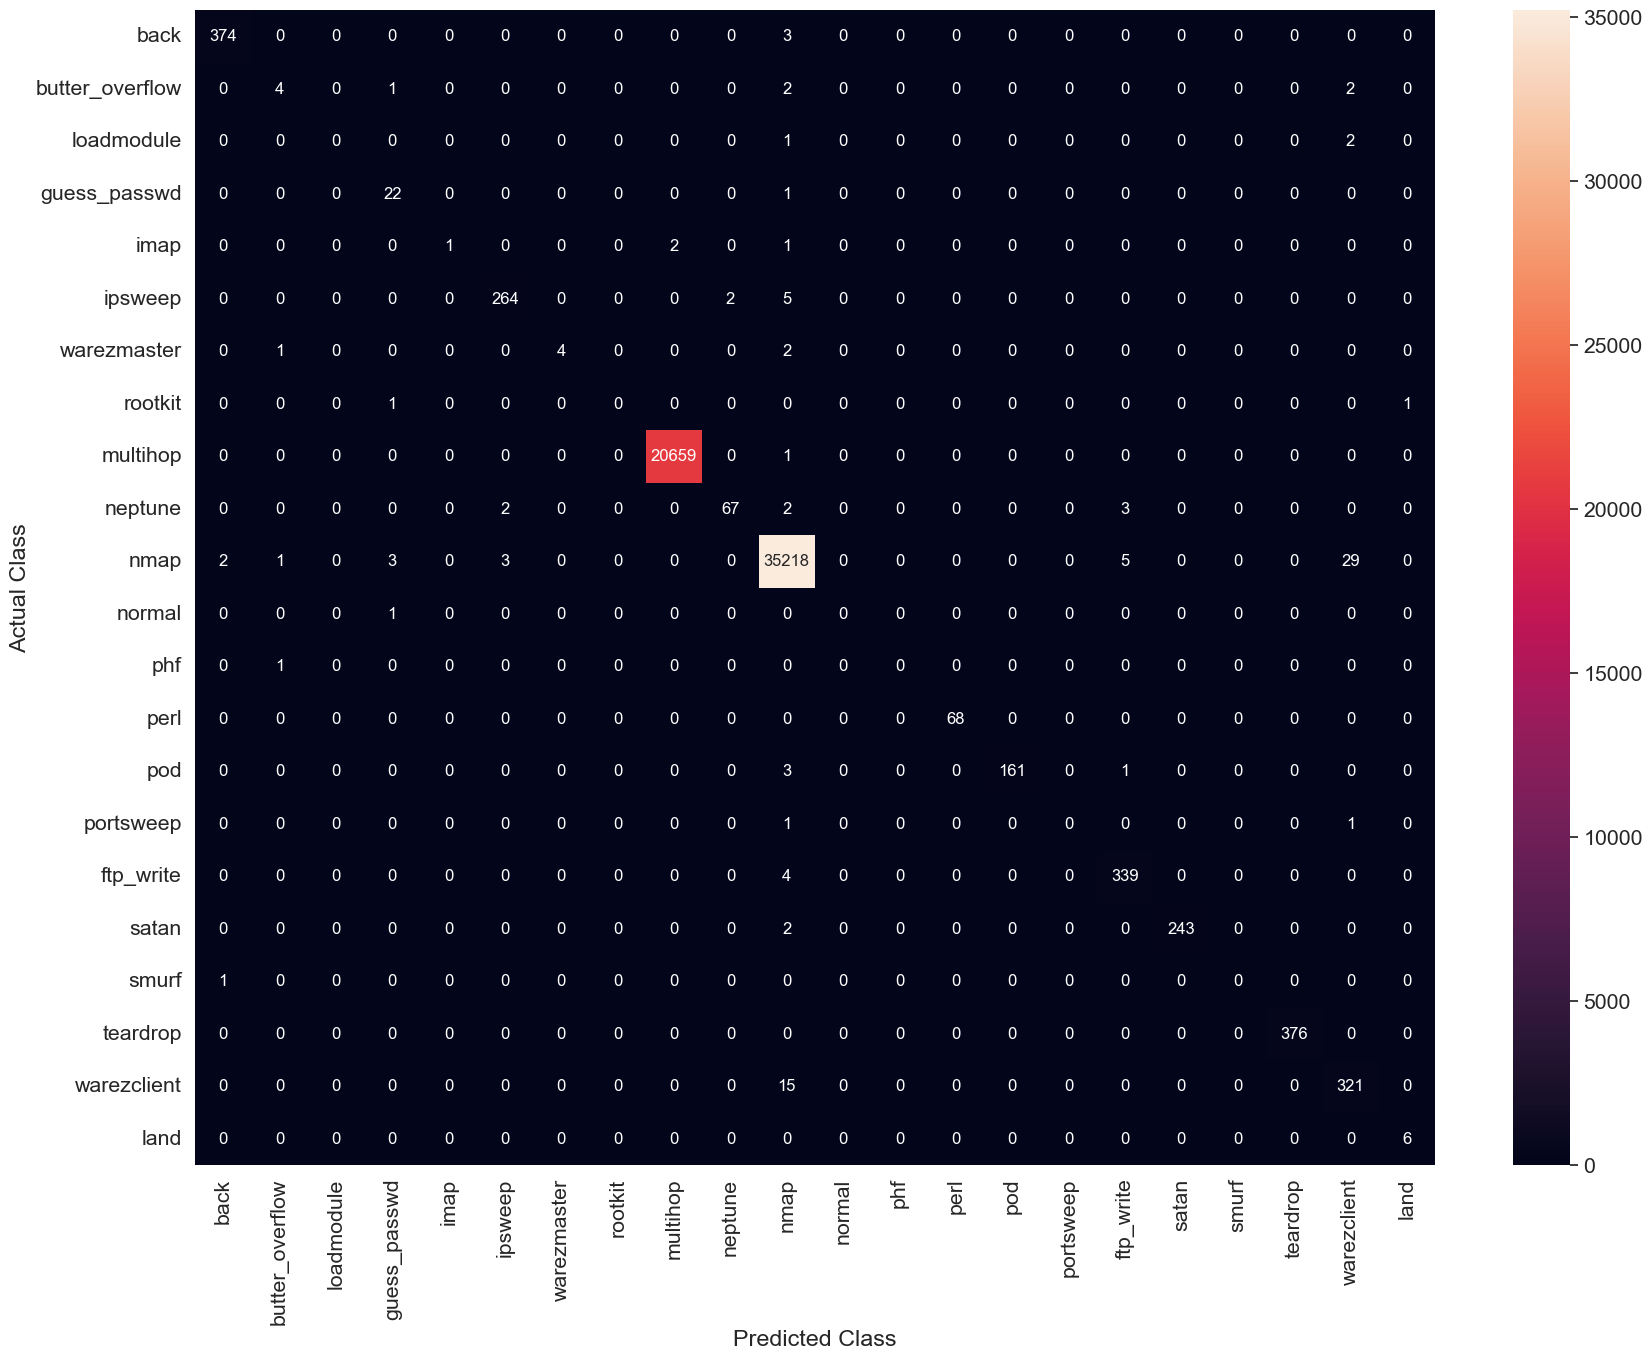

In [ ]:
confusion_matrix_func(y_eval, pred)